In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
df = pd.read_csv(r'C:\Users\dfvin\OneDrive\Documentos\Bootcamp_DS\Alumno\3-Machine_Learning\Proyecto_Machine_Learning\src\data\raw\healthcare-dataset-stroke-data.csv', index_col=0)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5110 entries, 9046 to 44679
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 479.1+ KB


In [80]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [81]:
# Variables numéricas

variables = [variable for variable in df.columns if variable not in ['id','stroke']]

conts = ['age','avg_glucose_level','bmi']

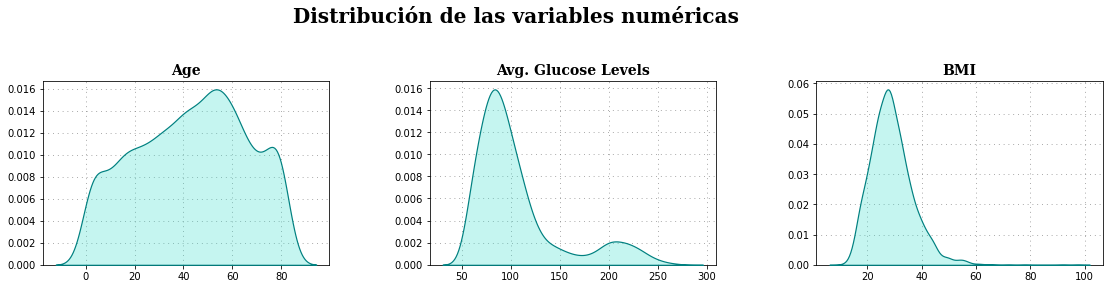

In [89]:
# Subplots de las 3 variables numéricas no binarias

fig = plt.figure(figsize=(19,12))
gs = fig.add_gridspec(3, 3)
gs.update(wspace=0.35, hspace=0.27)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[0, 2])

background_color = "white"

plot = 0
for feature in conts:
        sns.kdeplot(df[feature], ax=locals()["ax"+str(plot)], color='turquoise', shade=True, linewidth=1.2, ec='teal', alpha=0.3, zorder=3, legend=False)
        locals()["ax"+str(plot)].grid(which='major', axis='x', zorder=0, color='gray', linestyle=':', dashes=(1,5))
        plot += 1
        
ax0.set_title('Age', loc='center', fontsize=14, fontweight='heavy', fontfamily='serif')
ax0.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax0.set_ylabel('')
ax0.set_xlabel('')
ax1.set_title('Avg. Glucose Levels', loc='center', fontsize=14, fontweight='heavy', fontfamily='serif')
ax1.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax1.set_ylabel('')
ax1.set_xlabel('')
ax2.set_title('BMI', loc='center', fontsize=14, fontweight='heavy', fontfamily='serif')
ax2.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax2.set_ylabel('')
ax2.set_xlabel('')

ax0.text(85, 0.022, 'Distribución de las variables numéricas', fontsize=20, fontweight='heavy', fontfamily='serif')

plt.show()

In [83]:
stroke = df[df['stroke'] == 1]
no_stroke = df[df['stroke'] == 0]

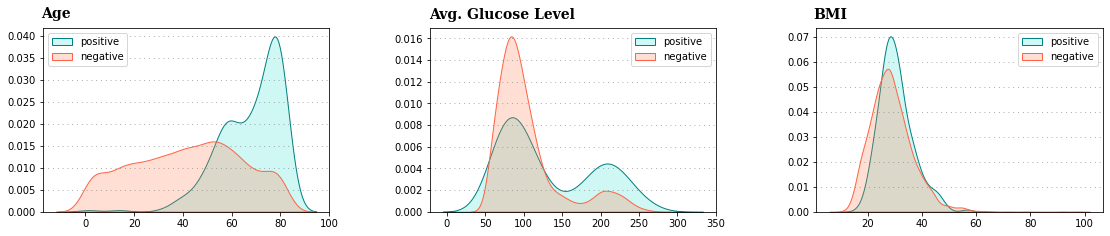

In [84]:
# Subplots de las 3 variables numéricas no binarias en base a la target

fig = plt.figure(figsize=(19,12))
gs = fig.add_gridspec(3, 3)
gs.update(wspace=0.35, hspace=0.27)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[0, 2])

background_color = "white"
fig.patch.set_facecolor(background_color)

# AGE
ax0.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
positive = pd.DataFrame(stroke["age"])
negative = pd.DataFrame(no_stroke["age"])
sns.kdeplot(positive["age"], ax=ax0,color="turquoise", shade=True, ec='teal', label="positive")
sns.kdeplot(negative["age"], ax=ax0, color="coral", shade=True, ec='tomato', label="negative")
ax0.set_ylabel('')    
ax0.set_xlabel('')
ax0.text(-18, 0.044, 'Age', fontsize=14, fontweight='heavy', fontfamily='serif')
ax0.legend(loc=2)

# AVG_GLUCOSE_LEVEL
ax1.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
positive = pd.DataFrame(stroke["avg_glucose_level"])
negative = pd.DataFrame(no_stroke["avg_glucose_level"])
sns.kdeplot(positive["avg_glucose_level"], ax=ax1, color="turquoise", ec='teal', shade=True, label="positive")
sns.kdeplot(negative["avg_glucose_level"], ax=ax1, color="coral", ec='tomato', shade=True, label="negative")
ax1.text(-23, 0.0178, 'Avg. Glucose Level', fontsize=14, fontweight='heavy', fontfamily='serif')
ax1.set_ylabel('')    
ax1.set_xlabel('')
ax1.legend(loc=0)

# BMI
ax2.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
positive = pd.DataFrame(stroke["bmi"])
negative = pd.DataFrame(no_stroke["bmi"])
sns.kdeplot(positive["bmi"], ax=ax2,color="turquoise", ec='teal', shade=True, label="positive")
sns.kdeplot(negative["bmi"], ax=ax2, color="coral", ec='tomato', shade=True, label="negative")
ax2.text(-0.06, 0.077, 'BMI', fontsize=14, fontweight='heavy', fontfamily='serif')
ax2.set_ylabel('')    
ax2.set_xlabel('')
ax2.legend(loc=0);

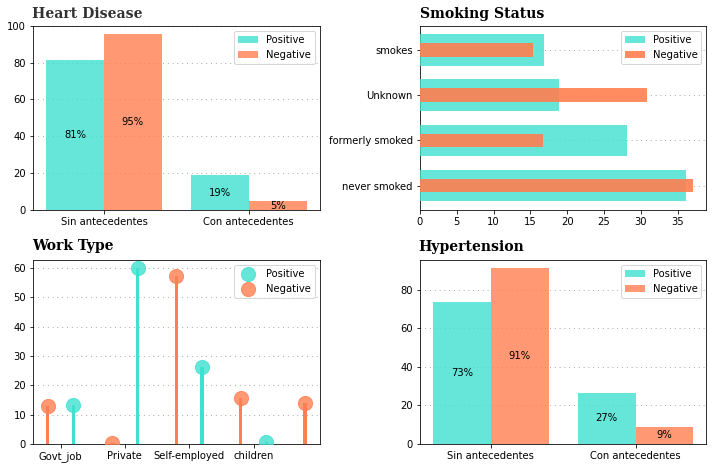

In [92]:
# Subplot con el resto de variables en base a la target

fig = plt.figure(figsize=(19,12))
gs = fig.add_gridspec(3,3)
gs.update(wspace=0.35, hspace=0.27)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])

background_color = "white"
fig.patch.set_facecolor(background_color)


# HEART DISEASE
positive = pd.DataFrame(stroke["heart_disease"].value_counts())
positive["Percentage"] = positive["heart_disease"].apply(lambda x: x/sum(positive["heart_disease"])*100)
negative = pd.DataFrame(no_stroke["heart_disease"].value_counts())
negative["Percentage"] = negative["heart_disease"].apply(lambda x: x/sum(negative["heart_disease"])*100)

x = np.arange(len(positive))
ax0.text(-0.3, 104, 'Heart Disease', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax0.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax0.bar(x, height=positive["Percentage"], zorder=3, color="turquoise", width=0.4, label='Positive', alpha=0.8)
ax0.bar(x+0.4, height=negative["Percentage"], zorder=3, color="coral", width=0.4, label='Negative', alpha=0.8)
ax0.set_xticks(x + 0.4 / 2)
ax0.set_xticklabels(['Sin antecedentes','Con antecedentes'])
ax0.legend()
for i,j in zip([0, 1], positive["Percentage"]):
    ax0.annotate(f'{j:0.0f}%',xy=(i, j/2), color='black', horizontalalignment='center', verticalalignment='center')
for i,j in zip([0, 1], negative["Percentage"]):
    ax0.annotate(f'{j:0.0f}%',xy=(i+0.4, j/2), color='black', horizontalalignment='center', verticalalignment='center')


# SMOKING STATUS
positive = pd.DataFrame(stroke["smoking_status"].value_counts())
positive["Percentage"] = positive["smoking_status"].apply(lambda x: x/sum(positive["smoking_status"])*100)
negative = pd.DataFrame(no_stroke["smoking_status"].value_counts())
negative["Percentage"] = negative["smoking_status"].apply(lambda x: x/sum(negative["smoking_status"])*100)

ax1.text(0, 3.7, 'Smoking Status', fontsize=14, fontweight='heavy', fontfamily='serif')
ax1.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax1.barh(positive.index, positive['Percentage'], color="turquoise", zorder=3, height=0.7, label='Positive', alpha=0.8)
ax1.barh(negative.index, negative['Percentage'], color="coral", zorder=3, height=0.3, label='Negative', alpha=0.9)
ax1.legend()


# WORK TYPE
positive = pd.DataFrame(stroke["work_type"].value_counts())
positive["Percentage"] = positive["work_type"].apply(lambda x: x/sum(positive["work_type"])*100)
positive = positive.sort_index()

negative = pd.DataFrame(no_stroke["work_type"].value_counts())
negative["Percentage"] = negative["work_type"].apply(lambda x: x/sum(negative["work_type"])*100)
negative = negative.sort_index()

ax2.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax2.bar(np.arange(len(positive.index))+0.4, height=positive["Percentage"], zorder=3, color="turquoise", width=0.05)
ax2.scatter(np.arange(len(positive.index))+0.4, positive["Percentage"], zorder=3,s=200, color="turquoise", label='Positive', alpha=0.8)
ax2.bar(negative.index, height=negative["Percentage"], zorder=3, color="coral", width=0.05)
ax2.scatter(negative.index, negative["Percentage"], zorder=3,s=200, color="coral", label='Negative', alpha=0.8)
ax2.set_xticks(np.arange(len(positive.index))+0.4 / 2)
ax2.set_xticklabels(list(positive.index),rotation=0)
ax2.text(-0.25, 66, 'Work Type', fontsize=14, fontweight='heavy', fontfamily='serif')
ax2.legend()


# HYPERTENSION
positive = pd.DataFrame(stroke["hypertension"].value_counts())
positive["Percentage"] = positive["hypertension"].apply(lambda x: x/sum(positive["hypertension"])*100)

negative = pd.DataFrame(no_stroke["hypertension"].value_counts())
negative["Percentage"] = negative["hypertension"].apply(lambda x: x/sum(negative["hypertension"])*100)

x = np.arange(len(positive))
ax3.text(-0.3, 100, 'Hypertension', fontsize=14, fontweight='heavy', fontfamily='serif')
ax3.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax3.bar(x, height=positive["Percentage"], zorder=3, color="turquoise", width=0.4, label='Positive', alpha=0.8)
ax3.bar(x+0.4, height=negative["Percentage"], zorder=3, color="coral", width=0.4, label='Negative', alpha=0.8)
ax3.set_xticks(x + 0.4 / 2)
ax3.set_xticklabels(['Sin antecedentes','Con antecedentes'])
ax3.legend()
for i,j in zip([0, 1], positive["Percentage"]):
    ax3.annotate(f'{j:0.0f}%',xy=(i, j/2), color='black', horizontalalignment='center', verticalalignment='center')
for i,j in zip([0, 1], negative["Percentage"]):
    ax3.annotate(f'{j:0.0f}%',xy=(i+0.4, j/2), color='black', horizontalalignment='center', verticalalignment='center');